In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
import tensorflow

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [3]:
laptop = pd.read_csv('dataset/completelaptopdata.csv', encoding= 'unicode_escape')

In [4]:
laptop = laptop.iloc[:,1:]

In [5]:
laptop['name'].unique()
laptop_list = ['ASUS','Lenovo','DELL','HP','acer','MSI','LG','realme','Avita','SAMSUNG','Infinix','Nokia','RedmiBook','APPLE','Mi','Vaio']
def extract_company(x):
    for i in laptop_list:
        if i.capitalize() in x.capitalize():
            return i
laptop['company'] = laptop['name'].apply(extract_company)

In [6]:
laptop['Battery Cell'] = laptop['Battery Cell'].str.lower()
laptop['Battery Cell'] = laptop['Battery Cell'].replace(' cell','-cell',regex=True)
laptop['Battery Cell'] = laptop['Battery Cell'].str.extract('(\d)-cell')

In [7]:
def categorise_laptop_suitablity(x):
    
    if 'Gaming' in x:
        return 1
    elif'Everyday Use' in x or 'Entertainment' in x:
        return 2
    else:
        return 3
laptop['Suitable_cat'] = laptop['Suitable For'].apply(categorise_laptop_suitablity)
laptop['Suitable_cat'].unique()
laptop[laptop['Suitable_cat']==3]['Suitable For'].unique()

array(['Processing & Multitasking', 'Travel & Business', 'Performance',
       'Processing & Multitasking, Travel & Business',
       'Performance, Processing & Multitasking, Travel & Business'],
      dtype=object)

In [8]:
laptop = laptop.drop('Type',axis=1)

In [9]:
laptop = laptop.drop('Suitable For',axis=1)

In [10]:
laptop = laptop.drop('Power Supply',axis=1)

In [11]:
laptop = laptop.drop('MS Office Provided',axis=1)

In [12]:
laptop['Dedicated Graphic Memory Type'].unique()

array(['GDDR6', nan, 'DDR4', 'GDDR3', 'GDDR5', 'DDR5'], dtype=object)

In [13]:
laptop['Dedicated Graphic Memory Capacity'].unique()

array(['8 GB', '4 GB', nan, '6 GB', '2 GB', '16 GB', '128 MB', '10 GB',
       '512 MB', '12 GB'], dtype=object)

In [14]:
laptop['Dedicated Graphic Memory Capacity'].unique()
def converttobytes(x):
    if x is not np.nan:
        if 'GB'not in x:
            print(x.split(' ')[0])
        else:
            return int(x.split(' ')[0])
    
    

In [15]:
laptop['Dedicated Graphic Memory Capacity in MB'] = laptop['Dedicated Graphic Memory Capacity'].apply(converttobytes)

128
128
512


In [16]:
laptop['Dedicated Graphic Memory Capacity in MB'].unique()

array([ 8.,  4., nan,  6.,  2., 16., 10., 12.])

In [17]:
laptop = laptop.drop('Dedicated Graphic Memory Capacity',axis=1)

In [18]:
laptop = laptop.drop('Processor Brand',axis=1)

In [19]:
laptop['Processor Name'].unique()

array(['Core i9', 'Ryzen 7 Octa Core', 'Core i5', 'Core i7',
       'Celeron Dual Core', 'Pentium Silver', 'Athlon Dual Core',
       'Ryzen 7 Dual Core', 'Ryzen 3 Quad Core', 'Ryzen 9 Octa Core',
       'Core i3', 'Ryzen 5 Hexa Core', 'Ryzen 5 Quad Core',
       'Ryzen 7 Hexa Core', 'Ryzen 7 Quad Core', 'Pentium Quad Core',
       'Celeron Quad Core', 'Snapdragon 7c Gen 2', 'Ryzen 5 Dual Core',
       'Ryzen 3 Dual Core', 'Dual Core', 'Ryzen 5 Octa Core', 'M1 Pro',
       'Ryzen 3 Hexa Core', 'APU Dual Core A6', 'MediaTek Kompanio 500',
       'M1', 'APU Dual Core A9', 'Hexa Core i5', 'Octa Core i7'],
      dtype=object)

In [20]:
laptop['Processor Generation'].unique()

array(['12th Gen', nan, '5th Gen', '11th Gen', '10th Gen', '7th Gen',
       '3rd Gen', '9th Gen', '4th Gen', '8th Gen'], dtype=object)

In [21]:
def getGen(x):
    if x is not np.nan:
        if 'th' in x:
            return int(x.split('th')[0])
        if 'rd' in x:
            return int(x.split('rd')[0])

In [22]:
laptop['Processor Generation'] = laptop['Processor Generation'].apply(getGen)

In [23]:
laptop['SSD'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
laptop['SSD Capacity'].unique()

array(['1 TB', '512 GB', '256 GB', '128 GB', nan, '2 TB'], dtype=object)

In [25]:
def converttoGbytes(x):
    if x is not np.nan:
        if 'TB' in x:
            return 1000 * int(x.split(' ')[0])
        else:
            return int(x.split(' ')[0])

In [26]:
laptop['SSD Capacity'] = laptop['SSD Capacity'].apply(converttoGbytes)

In [27]:
laptop = laptop.drop('Processor Variant',axis=1)

In [28]:
laptop['Brightness'].unique()

array([nan, '250 Nits', '300 Nits', '400 Nits', '220 Nits'], dtype=object)

In [29]:
laptop = laptop.drop('Brightness',axis=1)

In [30]:
laptop = laptop.drop('Laptop Bag',axis=1)

In [31]:
laptop = laptop.drop('Other Accessories',axis=1)

In [32]:
laptop = laptop.drop(['NFC Support','Stylus Included','TGP','VGA Port','Color Gamut','Inbuilt 4G LTE','Cloud Storage','S-video','Dock Port','Firewire Port','RJ11','Read/Write Speed','EMMC Storage Capacity','Optane Memory'],axis=1)

In [33]:
laptop = laptop.drop('link',axis=1)

In [34]:
laptop = laptop.drop('name',axis=1)

In [35]:
laptop = laptop.drop(['Model Number','Part Number','Model Name','Series'],axis=1)

In [36]:
laptop = laptop.drop('Sales Package',axis=1)

In [37]:
laptop = laptop.dropna(axis=0, subset=['user rating']) 

In [38]:
#laptop = laptop.drop('Sales Package',axis=1)

In [39]:
laptop_x, laptop_y = laptop.drop(['user rating', 'Price'],axis=1), laptop[['user rating', 'Price']]

In [40]:
laptop_x = laptop_x.replace(np.nan, '')
laptop_x['Number of Cores'] = laptop_x['Number of Cores'].replace('',0.0)
laptop_x['RPM']= laptop_x['RPM'].replace('',0.0)
laptop_x['Weight']=laptop_x['Weight'].replace('',0.0)

In [41]:
laptop['Battery Cell'].unique()

array(['4', nan, '3', '2', '6'], dtype=object)

In [42]:
laptop['Expandable Memory'].unique()

array(['64', nan, 'Upto 32 GB', '16', '32', '12', '20', '8', '16 GB',
       '24', 'Upto 16 GB', 'Yes', 'Upto 12 GB', 'Upto12GB', 'Upto 8GB',
       'Upto12 GB', '32 GB', 'Upto 20 GB', 'Upto 12GB', 'Up to 16 GB',
       '16GB', 'Upgradable Upto 20 GB', 'No', '40',
       'Upgradeable up to 20GB', 'Upto 40 GB', 'Upto 24 GB',
       'Up to 32 GB', 'Up to 16GB', '32GB'], dtype=object)

In [43]:
def extractBytes(x):
    if x is not np.nan:
        for i in x.split():
            if i.isdigit():
                return int(i)
            elif i.split('G')[0].isdigit():
                return int(i.split('G')[0])
            else:
                if len(i.split('G')[0].split('Upto'))>1:
                    if i.split('G')[0].split('Upto')[1].isdigit():
                        return int(i.split('G')[0].split('Upto')[1])
                

In [44]:
laptop['Expandable Memory'] = laptop['Expandable Memory'].apply(extractBytes)

In [45]:
laptop['Expandable Memory'].unique()

array([64., nan, 32., 16., 12., 20.,  8., 24., 40.])

In [46]:
def extractMBytes(x):
    if x is not np.nan:
        for i in x.split(' '):
            if i.isdigit():
                return int(i)
            elif i.split('M')[0].isdigit():
                return int(i.split('M')[0])
            else:
                if len(i.split('M')[0].split('Upto'))>1:
                    if i.split('M')[0].split('Upto')[1].isdigit():
                        return int(i.split('M')[0].split('Upto')[1])

In [47]:
laptop['Cache'] = laptop['Cache'].apply(extractMBytes)

In [48]:
laptop['OS Architecture'].unique()

array(['64 bit', nan, '32 bit'], dtype=object)

In [49]:
laptop['Operating System'].unique()

array(['Windows 11 Home', 'Windows 10', 'Chrome', 'Windows 10 Home',
       'DOS', 'Mac OS Monterey', 'Mac OS Big Sur', 'Windows 10 Pro',
       'Ubuntu'], dtype=object)

In [50]:
laptop = laptop.drop('Supported Operating System',axis=1)

In [51]:
laptop['Mic In'].unique()
laptop['Mic In'] = laptop['Mic In'].fillna("No")

In [52]:

laptop = laptop.drop('USB Port',axis=1)

In [53]:
laptop['HDMI Port'].unique()
laptop = laptop.drop('HDMI Port',axis=1)

In [54]:
laptop['Touchscreen'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
laptop = laptop.drop('Recovery Options',axis=1)

In [56]:
laptop['Face Recognition'].unique()
laptop['Face Recognition'] = laptop['Face Recognition'].fillna('No')
laptop['Face Recognition'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
laptop = laptop.drop(['System Architecture','Security Chip','Lock Port','HDD Capacity', 'International Warranty','Chipset','Antivirus'],axis=1)

In [58]:
laptop = laptop.drop(['Wireless WAN','Domestic Warranty','Ethernet', 'Pointer Device','Hardware Interface','Included Software'],axis=1)

In [59]:
laptop = laptop.drop(['Additional Features','Warranty Summary','Warranty Service Type', 'Covered in Warranty','Not Covered in Warranty'],axis=1)

In [60]:
laptop['RPM'].unique()

array([    nan, 4.0e+00, 5.4e+03, 7.2e+03])

In [61]:
laptop = laptop.drop("RPM",axis=1)

In [62]:
laptop = laptop.drop("Sound Chip",axis=1)

In [63]:
laptop = laptop.drop("Battery Backup",axis=1)

In [64]:
laptop = laptop.drop("Memory Slots",axis=1)

In [65]:
laptop['Weight'] = laptop['Weight'].str.extractall('(\d.\d+)').unstack().loc[:,0]

In [66]:
laptop['RAM'] = laptop['RAM'].apply(extractBytes)

In [67]:
laptop['Backlit Keyboard'] = laptop['Backlit Keyboard'].fillna("No")
laptop['Finger Print Sensor'] = laptop['Finger Print Sensor'].fillna("No")
laptop['Web Camera'] = laptop['Web Camera'].fillna("No")
laptop['Dedicated Graphic Memory Capacity in MB'] = laptop['Dedicated Graphic Memory Capacity in MB'].fillna(0.0)

In [68]:
def extractbit(x):
    if x is not np.nan:
        return x.split(' ')[0]

In [69]:
laptop['OS Architecture'] = laptop['OS Architecture'].apply(extractbit)

In [70]:
def extractWT(x):
    if x is not np.nan:
        return x.split(' ')[0]

In [71]:
int_col = laptop.select_dtypes(include=[np.float]).columns

In [72]:
laptop_object = laptop.select_dtypes('object')

In [73]:
laptop['Price'] = laptop['Price'].replace(',','', regex=True)
laptop['Price'] = laptop['Price'].str.extract('(\d+)').astype(float)

In [74]:
laptop['user rating'] = laptop['user rating'].astype(int)

In [75]:
laptop_x, laptop_y = laptop.drop(['user rating', 'Price'],axis=1), laptop[['user rating', 'Price']]

In [76]:
laptop_x_obj = laptop_x.select_dtypes('object')

In [77]:
laptop = laptop.fillna(0)

In [78]:
num_columns = laptop.select_dtypes(include=np.number).columns
num_columns
cat_columns = []
for col in laptop.columns:
    if col not in num_columns:
        cat_columns.append(col)

In [79]:
for cc in cat_columns:
    laptop[cc] = pd.Categorical(laptop[cc])
    laptop[cc] = laptop[cc].cat.codes

In [80]:
laptop_x, laptop_y = laptop.drop(['user rating', 'Price'],axis=1), laptop[['user rating', 'Price']]

In [81]:
corr_lap = laptop.corr()

In [82]:
price_col_ = list(corr_lap[corr_lap['Price']>0.5]['Price'].index)

In [83]:
userrating_col_ = list(corr_lap[corr_lap['user rating']>0.1]['user rating'].index)

In [84]:
userrating_col = [col for col in userrating_col_ if col not in price_col_]

In [85]:
rem_col = ['Price', 'user rating']

In [86]:
userrating_col = [col for col in userrating_col_ if col not in rem_col]
price_col = [col for col in price_col_ if col not in rem_col]

In [87]:
train_x, test_x = train_test_split(laptop_x,  random_state=42)

In [88]:
train_y, test_y = train_test_split(laptop_y,  random_state=42)

In [89]:
valid_x, test_x = train_test_split(test_x,  random_state=42)

In [90]:
valid_y, test_y = train_test_split(test_y,  random_state=42)

In [91]:
train_user_x = train_x
valid_user_x = valid_x
test_user_x = test_x
#train_user_x = train_x[price_col]
#valid_user_x = valid_x[price_col]
#test_user_x = test_x[price_col]
train_rating_x = train_x[userrating_col]
valid_rating_x = valid_x[userrating_col]
test_rating_x =test_x[userrating_col]

In [92]:
train_user_x = np.array(train_user_x, dtype=np.float32)
valid_user_x = np.array(valid_user_x, dtype=np.float32)
test_user_x = np.array(test_user_x, dtype=np.float32)
train_rating_x = np.array(train_rating_x,dtype=np.float32)
valid_rating_x =  np.array(valid_rating_x, dtype=np.float32)
test_rating_x =  np.array(test_rating_x,dtype=np.float32)

In [93]:
print(len(train_x), len(train_y), len(valid_x), len(valid_y), len(test_x), len(test_y))

517 517 129 129 44 44


In [94]:
corr_lap = laptop.corr()

In [95]:
corr_lap[corr_lap['Price']>0.5]['Price']

Price                                      1.000000
Dedicated Graphic Memory Type              0.572944
SSD Capacity                               0.708210
RAM                                        0.718217
Cache                                      0.518089
Number of Cores                            0.506365
Screen Resolution                          0.504974
Dedicated Graphic Memory Capacity in MB    0.648777
Name: Price, dtype: float64

In [96]:
corr_lap[corr_lap['user rating']>0.1]['user rating']

user rating                                1.000000
Price                                      0.193050
Dedicated Graphic Memory Type              0.125035
Processor Name                             0.148968
SSD                                        0.396962
SSD Capacity                               0.247314
RAM                                        0.174961
Clock Speed                                0.109070
Cache                                      0.152568
Number of Cores                            0.129461
Operating System                           0.185911
Screen Resolution                          0.129649
Wireless LAN                               0.129255
Disk Drive                                 0.117127
Backlit Keyboard                           0.220258
Dedicated Graphic Memory Capacity in MB    0.142788
Name: user rating, dtype: float64

In [97]:
price_col = list(corr_lap[corr_lap['Price']>0.5]['Price'].index)

In [98]:
userrating_col_ = list(corr_lap[corr_lap['user rating']>0.1]['user rating'].index)

In [99]:
userrating_col = [col for col in userrating_col_ if col not in price_col]

In [100]:
train_user_x

array([[18.,  2.,  0., ...,  7.,  3.,  0.],
       [ 4.,  0.,  0., ...,  6.,  3.,  0.],
       [31.,  3.,  4., ...,  1.,  1.,  4.],
       ...,
       [ 9.,  0.,  4., ...,  7.,  3.,  4.],
       [ 4.,  0.,  0., ...,  6.,  3.,  0.],
       [ 2.,  0.,  4., ..., 13.,  1.,  6.]], dtype=float32)

In [101]:
train_rating_x

array([[ 0.,  5.,  1., ...,  2.,  1.,  0.],
       [ 0.,  5.,  1., ...,  2.,  0.,  0.],
       [ 4., 21.,  1., ...,  2.,  1.,  4.],
       ...,
       [ 4.,  6.,  1., ...,  2.,  1.,  4.],
       [ 0.,  6.,  1., ...,  2.,  1.,  0.],
       [ 4.,  8.,  1., ...,  2.,  1.,  6.]], dtype=float32)

In [102]:
input_1 = keras.layers.Input(shape=train_user_x[0].shape[0])
input_2 = keras.layers.Input(shape=train_rating_x[0].shape[0])
#input_3 = keras.layers.concatenate([input_1,input_2])
hidden_1 = keras.layers.Dense(30,activation='relu')(input_1)
hidden_2 = keras.layers.Dense(30,activation='relu')(hidden_1)
hidden_3 = keras.layers.Dense(30,activation='relu')(hidden_2)
hidden_4 = keras.layers.Dense(30,activation='relu')(hidden_3)
hidden_5 = keras.layers.Dense(30,activation='relu')(hidden_4)
concat = keras.layers.concatenate([input_2,hidden_4])
output_1 = keras.layers.Dense(6,name='userrating', activation='softmax')(concat)
output_2 = keras.layers.Dense(1, name='price')(hidden_4)

model = keras.Model(inputs=[input_1, input_2], outputs=[output_1, output_2])

In [103]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 41)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           1260        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           930         dense_1[0][0]                    
______________________________________________________________________________________________

In [104]:
model.compile(loss=['sparse_categorical_crossentropy','mse'], metrics={'price': keras.metrics.RootMeanSquaredError(),
                     'userrating': 'accuracy'}, optimizer=keras.optimizers.Adam(lr=0.0001))

history = model.fit((train_user_x,train_rating_x),(train_y['user rating'],train_y['Price']),epochs=100,validation_data=((valid_user_x, valid_rating_x),(valid_y['user rating'],valid_y['Price'])))

Epoch 1/100
17/17 [==============================] - 1s 22ms/step - loss: 4656062307.5556 - userrating_loss: 48.3726 - price_loss: 4656062307.5556 - userrating_accuracy: 0.1337 - price_root_mean_squared_error: 68217.9865 - val_loss: 4178351616.0000 - val_userrating_loss: 44.9986 - val_price_loss: 4178351616.0000 - val_userrating_accuracy: 0.1783 - val_price_root_mean_squared_error: 64640.1719
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 4648875434.6667 - userrating_loss: 52.3856 - price_loss: 4648875434.6667 - userrating_accuracy: 0.1052 - price_root_mean_squared_error: 68170.5339 - val_loss: 4177144832.0000 - val_userrating_loss: 43.4882 - val_price_loss: 4177144576.0000 - val_userrating_accuracy: 0.2016 - val_price_root_mean_squared_error: 64630.8320
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 4559254670.2222 - userrating_loss: 42.5647 - price_loss: 4559254670.2222 - userrating_accuracy: 0.1282 - price_root_mean_squared_error: 

Epoch 22/100
17/17 [==============================] - 0s 6ms/step - loss: 4130116963.5556 - userrating_loss: 219.7375 - price_loss: 4130116878.2222 - userrating_accuracy: 0.1897 - price_root_mean_squared_error: 64230.8175 - val_loss: 3956622336.0000 - val_userrating_loss: 226.7340 - val_price_loss: 3956622080.0000 - val_userrating_accuracy: 0.1705 - val_price_root_mean_squared_error: 62901.6875
Epoch 23/100
17/17 [==============================] - 0s 6ms/step - loss: 4819570488.8889 - userrating_loss: 229.3702 - price_loss: 4819570403.5556 - userrating_accuracy: 0.1861 - price_root_mean_squared_error: 69328.5690 - val_loss: 3915621888.0000 - val_userrating_loss: 225.5643 - val_price_loss: 3915621120.0000 - val_userrating_accuracy: 0.1705 - val_price_root_mean_squared_error: 62574.9258
Epoch 24/100
17/17 [==============================] - 0s 6ms/step - loss: 4838467925.3333 - userrating_loss: 228.9347 - price_loss: 4838467896.8889 - userrating_accuracy: 0.1565 - price_root_mean_squared_

Epoch 43/100
17/17 [==============================] - 0s 13ms/step - loss: 1186456398.2222 - userrating_loss: 42.2765 - price_loss: 1186456394.6667 - userrating_accuracy: 0.6984 - price_root_mean_squared_error: 34400.8205 - val_loss: 894582400.0000 - val_userrating_loss: 124.3248 - val_price_loss: 894582336.0000 - val_userrating_accuracy: 0.7442 - val_price_root_mean_squared_error: 29909.5684
Epoch 44/100
17/17 [==============================] - 0s 8ms/step - loss: 988472942.2222 - userrating_loss: 42.5391 - price_loss: 988472888.8889 - userrating_accuracy: 0.6912 - price_root_mean_squared_error: 31360.3777 - val_loss: 752645696.0000 - val_userrating_loss: 121.0755 - val_price_loss: 752645632.0000 - val_userrating_accuracy: 0.7442 - val_price_root_mean_squared_error: 27434.3887
Epoch 45/100
17/17 [==============================] - 0s 7ms/step - loss: 1064928252.4444 - userrating_loss: 44.3847 - price_loss: 1064928248.8889 - userrating_accuracy: 0.7332 - price_root_mean_squared_error: 3

Epoch 64/100
17/17 [==============================] - 0s 5ms/step - loss: 528447434.6667 - userrating_loss: 28.1083 - price_loss: 528447424.0000 - userrating_accuracy: 0.6743 - price_root_mean_squared_error: 22873.1707 - val_loss: 342355488.0000 - val_userrating_loss: 137.2013 - val_price_loss: 342355360.0000 - val_userrating_accuracy: 0.7054 - val_price_root_mean_squared_error: 18502.8477
Epoch 65/100
17/17 [==============================] - 0s 6ms/step - loss: 423594016.8889 - userrating_loss: 24.8429 - price_loss: 423593953.7778 - userrating_accuracy: 0.7036 - price_root_mean_squared_error: 20466.1337 - val_loss: 341705664.0000 - val_userrating_loss: 138.2233 - val_price_loss: 341705536.0000 - val_userrating_accuracy: 0.7364 - val_price_root_mean_squared_error: 18485.2793
Epoch 66/100
17/17 [==============================] - 0s 7ms/step - loss: 545989066.6667 - userrating_loss: 31.3379 - price_loss: 545989061.3333 - userrating_accuracy: 0.6619 - price_root_mean_squared_error: 23315.

Epoch 85/100
17/17 [==============================] - 0s 5ms/step - loss: 505688684.4444 - userrating_loss: 33.8793 - price_loss: 505688625.7778 - userrating_accuracy: 0.6891 - price_root_mean_squared_error: 22464.2437 - val_loss: 325430528.0000 - val_userrating_loss: 144.9135 - val_price_loss: 325430400.0000 - val_userrating_accuracy: 0.7442 - val_price_root_mean_squared_error: 18039.6895
Epoch 86/100
17/17 [==============================] - 0s 6ms/step - loss: 379842792.8889 - userrating_loss: 28.4598 - price_loss: 379842744.8889 - userrating_accuracy: 0.7021 - price_root_mean_squared_error: 19408.6345 - val_loss: 324162784.0000 - val_userrating_loss: 143.1998 - val_price_loss: 324162656.0000 - val_userrating_accuracy: 0.7442 - val_price_root_mean_squared_error: 18004.5176
Epoch 87/100
17/17 [==============================] - 0s 6ms/step - loss: 449534197.3333 - userrating_loss: 27.4232 - price_loss: 449534128.0000 - userrating_accuracy: 0.7146 - price_root_mean_squared_error: 21118.

In [105]:
import os
import tensorflow as tf
model_version = '0001'
model_name = 'first_model'
model_path = os.path.join(model_name, model_version)
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: first_model\0001\assets


In [106]:
saved_model = tf.saved_model.load(model_path)

In [107]:
train_x.shape[0]

517

In [108]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_path)
converter.optimizations=[tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
with open("converted_model.tflite","wb") as f:
    f.write(tflite_model)

In [109]:
valid_x.shape

(129, 41)

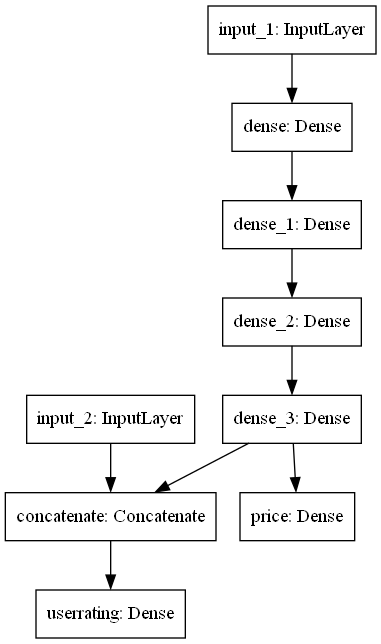

In [110]:
keras.utils.plot_model(model)

In [111]:
#test_user_x = tf.convert_to_tensor(test_user_x, dtype=np.float32)
#test_rating_x = tf.convert_to_tensor(test_rating_x, dtype=np.float32)
predictions=saved_model([test_user_x, test_rating_x], training=False)

In [112]:
price_pred = predictions[1]
rate_pred = predictions[0]

In [113]:
final= []
for rate in rate_pred:
    final.append(np.argmax(rate))

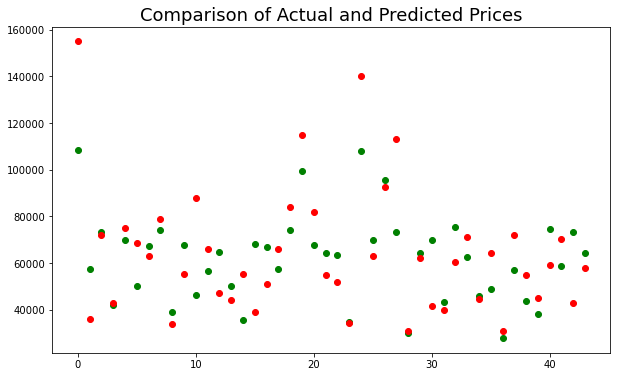

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(price_pred)), price_pred, color='green')
plt.scatter(range(len(price_pred)), test_y['Price'], color='red')
#plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

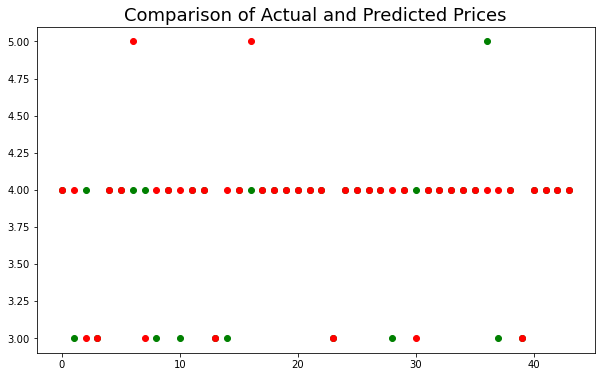

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(final)), final, color='green')
plt.scatter(range(len(final)), test_y['user rating'], color='red')
#plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

In [116]:
import requests
import json

data = {"signature_name":"serving_default",
                   "instances":[{
                        'input_1':test_user,
                        'input_2':test_rating} for test_user, test_rating in zip(test_user_x.tolist(),test_rating_x.tolist())]}
headers = {"content-type":"application/json"}

json_response = requests.post('http://localhost:8501/v1/models/first_model:predict',json=data,headers=headers)
json_response.raise_for_status()
response =  json.loads(json_response.text)

In [117]:
y_proba = np.array(response['predictions'])

In [118]:
for i in y_proba:
    print(i['price'])
    print(np.argmax(i['userrating']))
              

[105656.102]
4
[57755.8633]
3
[72338.8672]
4
[49985.957]
5
[66300.2891]
4
[48083.0234]
4
[66347.8125]
4
[73478.4531]
4
[40806.8398]
3
[67729.8203]
4
[49968.7578]
4
[55866.375]
4
[60531.375]
4
[52304.9805]
4
[41751.8164]
3
[67924.6172]
4
[64787.1562]
4
[58797.8438]
4
[74668.6094]
4
[93231.7266]
4
[68841.0469]
4
[68696.1641]
4
[62355.7773]
4
[41487.9453]
3
[108396.594]
4
[71088.2812]
4
[92032.8828]
4
[78951.9453]
4
[36167.1914]
3
[63992.2734]
4
[68813.0391]
4
[46091.1328]
4
[74645.8828]
4
[59038.4102]
4
[44276.7617]
4
[53067.4766]
3
[28620.8438]
3
[62743.8594]
3
[49491.1719]
5
[48067.625]
3
[71073.5234]
4
[53583.793]
4
[75992.6406]
4
[63189.3203]
4


In [119]:
from tensorflow_serving.apis.predict_pb2 import PredictRequest

In [120]:
model.input_names

['input_1', 'input_2']

In [121]:
request = PredictRequest()
request.model_spec.name = model_name
request.model_spec.signature_name ='serving_default'
input_name_1 = model.input_names[0]
input_name_2 = model.input_names[1]

In [122]:
request.inputs[input_name_1].CopyFrom(tf.make_tensor_proto(test_user_x))
request.inputs[input_name_2].CopyFrom(tf.make_tensor_proto(test_rating_x))

In [123]:
import grpc
from tensorflow_serving.apis import prediction_service_pb2_grpc

channel = grpc.insecure_channel('localhost:8500')
predict_service = prediction_service_pb2_grpc.PredictionServiceStub(channel)
response = predict_service.Predict(request, timeout=10.0)

In [124]:
output_name_1 = model.output_names[0]
output_name_2 = model.output_names[1]
outputs_proto_1 = response.outputs[output_name_1]
outputs_proto_2 = response.outputs[output_name_2]
y_proba_1 = tf.make_ndarray(outputs_proto_1)
y_proba_2 = tf.make_ndarray(outputs_proto_2)

In [125]:
y_proba_2

array([[105656.1  ],
       [ 57755.863],
       [ 72338.87 ],
       [ 49985.957],
       [ 66300.29 ],
       [ 48083.023],
       [ 66347.81 ],
       [ 73478.45 ],
       [ 40806.84 ],
       [ 67729.82 ],
       [ 49968.758],
       [ 55866.375],
       [ 60531.375],
       [ 52304.98 ],
       [ 41751.816],
       [ 67924.62 ],
       [ 64787.156],
       [ 58797.844],
       [ 74668.61 ],
       [ 93231.73 ],
       [ 68841.05 ],
       [ 68696.164],
       [ 62355.777],
       [ 41487.945],
       [108396.59 ],
       [ 71088.28 ],
       [ 92032.88 ],
       [ 78951.945],
       [ 36167.19 ],
       [ 63992.273],
       [ 68813.04 ],
       [ 46091.133],
       [ 74645.88 ],
       [ 59038.41 ],
       [ 44276.76 ],
       [ 53067.477],
       [ 28620.844],
       [ 62743.86 ],
       [ 49491.17 ],
       [ 48067.625],
       [ 71073.52 ],
       [ 53583.793],
       [ 75992.64 ],
       [ 63189.32 ]], dtype=float32)

In [126]:
import os
import tensorflow as tf
model_version = '0002'
model_name = 'first_model'
model_path = os.path.join(model_name, model_version)
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: first_model\0002\assets
